Samarbeidet med André Langvik, Adrian Risberg, Martin Smedstad
 

In [ ]:
Kode inspirert av Espen Sirnes

In [15]:
from bs4 import BeautifulSoup  #funksjon som leter etter "html_tags" 
import requests

def find_tags(url):
    "Returns a list of tables in the html of url"
    page = requests.get(url)
    bs=BeautifulSoup(page.content)
    tables=bs.find_all("table")
    return tables

tables=find_tags("https://e24.no/spesial/skattelister/")
tabell=tables[0]

#printing top
print(str(tabell)[:1000])

<table class="table table-sm"><thead><tr><th class="w-5"></th><th class="w-30">Navn</th><th class="text-right clickable">Inntekt<i class="material-icons md-14 middle"></i></th><th class="text-right clickable">Formue</th><th class="text-right clickable">Skatt</th></tr></thead><tbody><tr><td>1<!-- -->.</td><td><div class="name">TROND<!-- --> <!-- -->MOHN</div><div class="text-muted"><a class="text-muted" href="/spesial/skattelister/2020/4601/">Bergen</a>, f.<!-- --> <!-- -->1943</div></td><td class="text-right">303 269 738</td><td class="text-right">3 606 959 160</td><td class="text-right">135 160 646</td></tr><tr><td>2<!-- -->.</td><td><div class="name">IVAR ERIK<!-- --> <!-- -->TOLLEFSEN</div><div class="text-muted"><a class="text-muted" href="/spesial/skattelister/2020/3024/">Bærum</a>, f.<!-- --> <!-- -->1961</div></td><td class="text-right">289 644 215</td><td class="text-right">7 648 362 960</td><td class="text-right">156 536 011</td></tr><tr><td>3<!-- -->.</td><td><div class="nam

In [16]:
def hente_tabel(html):   #funksjon som leser tagsa, henter ut informasjonen og rydder opp
    "Returns the table defined in html as a list"
    #defining the table:
    table=[]
    #iterating over all rows
    for row in html.find_all("tr"):
        r=[]
        #finding all cells in each row:
        cells=row.find_all("td")
        
        #if no cells are found, look for headings
        if len(cells)==0:
            cells=row.find_all("th")
            
        #iterate over cells:
        for cell in cells:
            cell=format(cell)
            r.append(cell)
        
        #append the row to t:
        table.append(r)
    return table

def format(cell):
    "Returns a string after converting bs4 object cell to clean text"
    if cell.content is None:
        s=cell.text
    elif len(cell.content)==0:
        return ""
    else:
        s=" ".join([str(c) for c in cell.content])
        
    #here you can add additional characters/strings you want to 
    #remove, change punctuations or format the string in other
    #ways:
    s=s.replace("\ue5cf" ,"")
    s=s.replace("\xa0","")
    s=s.replace("\n","")
    return s

table=hente_tabel(tabell)

#printing top
print(str(table)[:1000])

[['', 'Navn', 'Inntekt', 'Formue', 'Skatt'], ['1.', 'TROND MOHNBergen, f.1943', '303269738', '3606959160', '135160646'], ['2.', 'IVAR ERIK TOLLEFSENBærum, f.1961', '289644215', '7648362960', '156536011'], ['3.', 'ØYSTEIN STRAY SPETALENOslo, f.1962', '258709731', '2586723237', '105131374'], ['4.', 'GUSTAV MAGNAR WITZØEFrøya, f.1993', '211595385', '19617118157', '233600333'], ['5.', 'ØYSTEIN MOANOslo, f.1959', '181404420', '961391825', '52228271'], ['6.', 'ØYVIND GROTMOLBærum, f.1980', '168981563', '127304452', '54596137'], ['7.', 'MAGNUS REITANOslo, f.1975', '166542768', '4620795695', '92706050'], ['8.', 'OLE ROBERT REITANOslo, f.1971', '162833343', '4546957558', '90924296'], ['9.', 'EKATERINA MOHNBergen, f.1981', '158931093', '279843781', '52579391'], ['10.', 'MARGARET BOEL GARMANNOslo, f.1955', '154930624', '2562173467', '70855059'], ['11.', 'TORKELL TVEITEVOLL EIDESandnes, f.1980', '152861585', '148645207', '44155805'], ['12.', 'MARTINUS BRANDALFærder, f.1960', '133893960', '13820640

In [3]:
":".join(table[0])

':Navn:Inntekt:Formue:Skatt'

In [4]:
def save_data(file_name,table):
    "Saves table to file_name"
    f=open(file_name, "w")
    for row in table:
        f.write(":".join(row)+"\n")
    f.close()
    
save_data("skattetall.csv",table)

In [5]:
import pandas as pd #lgaer en tabll 
data = pd.read_csv("skattetall.csv", delimiter=":", encoding="utf-8") 
data

,Unnamed: 0,Navn,Inntekt,Formue,Skatt
0,1.0,"TROND MOHNBergen, f.1943",303269738,3606959160,135160646
1,2.0,"IVAR ERIK TOLLEFSENBærum, f.1961",289644215,7648362960,156536011
2,3.0,"ØYSTEIN STRAY SPETALENOslo, f.1962",258709731,2586723237,105131374
3,4.0,"GUSTAV MAGNAR WITZØEFrøya, f.1993",211595385,19617118157,233600333
4,5.0,"ØYSTEIN MOANOslo, f.1959",181404420,961391825,52228271
5,6.0,"ØYVIND GROTMOLBærum, f.1980",168981563,127304452,54596137
6,7.0,"MAGNUS REITANOslo, f.1975",166542768,4620795695,92706050
7,8.0,"OLE ROBERT REITANOslo, f.1971",162833343,4546957558,90924296
8,9.0,"EKATERINA MOHNBergen, f.1981",158931093,279843781,52579391
9,10.0,"MARGARET BOEL GARMANNOslo, f.1955",154930624,2562173467,70855059


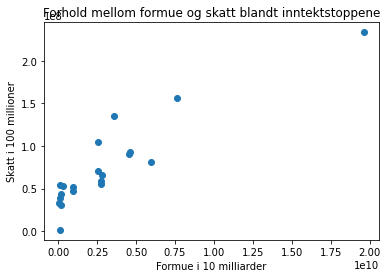

In [6]:
from matplotlib import pyplot as plt #plotter dataen 

fig,ax=plt.subplots()

#adding axis lables:
ax.set_xlabel('Formue i 10 milliarder')
ax.set_ylabel('Skatt i 100 millioner')
plt.title('Forhold mellom formue og skatt blandt inntektstoppene')

#plotting the function:
ax.scatter(data['Formue'], data['Skatt'])


In [7]:
y=data["Skatt"] #Henter ut data til regresjon
pd.DataFrame(y)

,Skatt
0,135160646
1,156536011
2,105131374
3,233600333
4,52228271
5,54596137
6,92706050
7,90924296
8,52579391
9,70855059


In [8]:
x=pd.DataFrame(data["Formue"])  #Henter ut data til regresjon og legger til en intercept
x["intercept"]=1
x

,Formue,intercept
0,3606959160,1
1,7648362960,1
2,2586723237,1
3,19617118157,1
4,961391825,1
5,127304452,1
6,4620795695,1
7,4546957558,1
8,279843781,1
9,2562173467,1


In [9]:
from statsmodels.regression.linear_model import OLS #bruker OLS til å ta en regresjon av dataen 

res=OLS(y,x).fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Skatt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     85.81
Date:                Tue, 29 Mar 2022   Prob (F-statistic):           2.86e-08
Time:                        12:43:58   Log-Likelihood:                -365.66
No. Observations:                  20   AIC:                             735.3
Df Residuals:                      18   BIC:                             737.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Formue         0.0106      0.001      9.263      0.0

In [10]:
res.params

Formue       1.059993e-02
intercept    4.201722e+07
dtype: float64

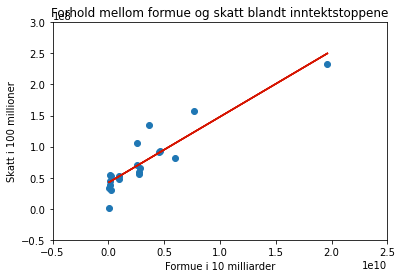

In [19]:
import numpy as np #ploter dataen og regresjonslinja
x=np.linspace(min(data['Formue']), max(data['Formue']), 100)

regression_line=res.params['intercept']+res.params['Formue']*x

ax.plot(x, regression_line,color='r')
plt.style.context('dark_background')

fig

Brukte en funksjon til å skrape e24 sin nettside. Fikk da en tabell over norges 20 høyeste intekter. Ryddet i dataen for å få ut en tabell, som var mulig å plotte. Plottet så et plott som viser forholdet mellom skatt og formue balandt inntektstoppene i Norge. Videre brukte jeg dataen til å ta en regresjon, som viser koralasjonen mellom skatt og formue. 
Fikk da et tall på 0,016. Dette betyr at for en krone økning i formue, vil gi en økning i skatt på 0,016. 
Fikk også en "intercept" som angir hvor grafen vil krysse y aksen. 
Regresjonslinja viser den beste sammenhengen mellom skatt og formue.